# Análise Exploratória dos Dados do Ibovespa

Este notebook realiza a análise exploratória dos dados históricos do Ibovespa, identificando padrões, tendências e possíveis outliers.

## Passo 1: Importar Bibliotecas Necessárias

Primeiro, vamos importar as bibliotecas que utilizaremos no processo de análise exploratória.

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Passo 2: Carregar os Dados Preparados

Vamos carregar o arquivo CSV contendo os dados históricos do Ibovespa que foram preparados no passo anterior.

Aqui, carregamos os dados históricos do Ibovespa a partir de um arquivo CSV. A coluna `Data` é convertida para o formato datetime para facilitar a manipulação das datas.


In [77]:
# Carregar os dados preparados
df = pd.read_csv('dados_preparados.csv')
df['Data'] = pd.to_datetime(df['Data'], format='%Y-%m-%d')
df.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%,Evento_Eleição Presidencial 2022,Evento_Impeachment de Dilma Rousseff,Evento_Nenhum,Evento_Pandemia de COVID-19,Evento_Recessão Econômica Brasileira,Evento_Recuperação Pós-Pandemia,Vol_log
0,2024-07-12,128.897,128.293,129.015,128.002,7.210000e+09,0.47,False,False,False,False,False,True,22.698735
1,2024-07-11,128.294,127.221,128.326,127.221,7.970000e+09,0.85,False,False,False,False,False,True,22.798950
2,2024-07-10,127.218,127.109,127.769,126.928,8.150000e+09,0.09,False,False,False,False,False,True,22.821284
3,2024-07-09,127.108,126.548,127.295,125.937,6.680000e+09,0.44,False,False,False,False,False,True,22.622384
4,2024-07-08,126.548,126.280,126.551,125.614,7.430000e+09,0.22,False,False,False,False,False,True,22.728792


In [78]:
# Identificar outliers usando o método do IQR (Interquartile Range)
Q1 = df['Vol.'].quantile(0.25)
Q3 = df['Vol.'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Vol.'] < (Q1 - 1.5 * IQR)) | (df['Vol.'] > (Q3 + 1.5 * IQR))]

# Remover os outliers
df_no_outliers = df[~df.index.isin(outliers.index)]
df_no_outliers.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%,Evento_Eleição Presidencial 2022,Evento_Impeachment de Dilma Rousseff,Evento_Nenhum,Evento_Pandemia de COVID-19,Evento_Recessão Econômica Brasileira,Evento_Recuperação Pós-Pandemia,Vol_log
13,2024-06-25,122.331,122.634,122.849,121.997,6940000.0,-0.25,False,False,False,False,False,True,15.752812
14,2024-06-24,122.637,121.343,122.840,121.307,7840000.0,1.07,False,False,False,False,False,True,15.874750
15,2024-06-21,121.341,120.446,121.580,120.061,12910000.0,0.74,False,False,False,False,False,True,16.373513
16,2024-06-20,120.446,120.267,121.607,120.156,8660000.0,0.15,False,False,False,False,False,True,15.974225
17,2024-06-19,120.261,119.630,120.383,118.960,5650000.0,0.53,False,False,False,False,False,True,15.547166


## Passo 4: Análise Exploratória dos Dados

### 4.1: Fechamento Diário

Vamos plotar o gráfico do fechamento diário do Ibovespa ao longo do tempo.

Este gráfico mostra a evolução do fechamento diário do Ibovespa ao longo do tempo. Podemos observar tendências gerais e identificar períodos de maior volatilidade.


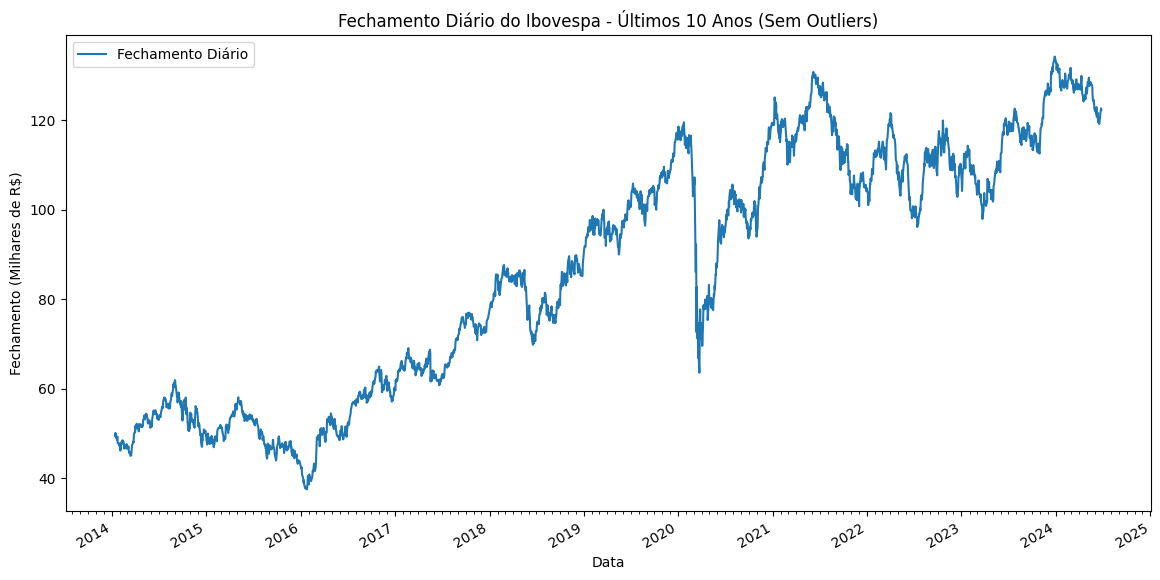

In [79]:
# Fechamento Diário
plt.figure(figsize=(14, 7))
plt.plot(df_no_outliers['Data'], df_no_outliers['Último'], label='Fechamento Diário')

# Formatar o eixo x para melhorar a legibilidade das datas
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gcf().autofmt_xdate()

plt.xlabel('Data')
plt.ylabel('Fechamento (Milhares de R$)')
plt.title('Fechamento Diário do Ibovespa - Últimos 10 Anos (Sem Outliers)')
plt.legend()
plt.show()


### 4.2: Volume Diário

Vamos plotar o gráfico do volume diário de negociações do Ibovespa ao longo do tempo.

Este gráfico mostra a evolução do volume diário de negociações do Ibovespa ao longo do tempo. Isso nos ajuda a entender os períodos de maior atividade no mercado.


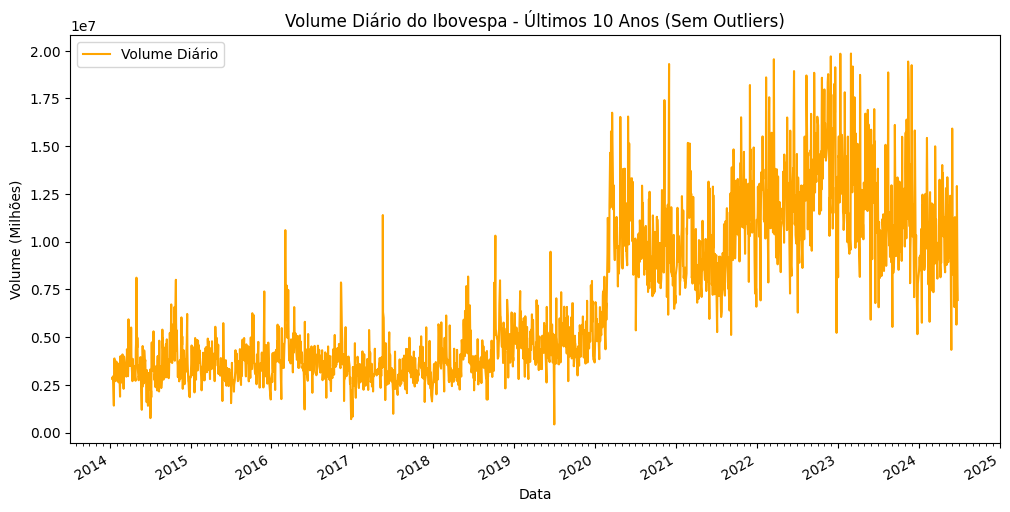

In [80]:
# Volume Diário
plt.figure(figsize=(12, 6))
plt.plot(df_no_outliers['Data'], df_no_outliers['Vol.'], label='Volume Diário', color='orange')

# Formatar o eixo x para melhorar a legibilidade das datas
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gcf().autofmt_xdate()

plt.xlabel('Data')
plt.ylabel('Volume (Milhões)')
plt.title('Volume Diário do Ibovespa - Últimos 10 Anos (Sem Outliers)')
plt.legend()
plt.show()

### 4.3: Variação Percentual Diária

Vamos plotar o gráfico da variação percentual diária do Ibovespa ao longo do tempo.

Este gráfico mostra a variação percentual diária do Ibovespa ao longo do tempo. Podemos observar a volatilidade do mercado e identificar períodos de alta ou baixa volatilidade.


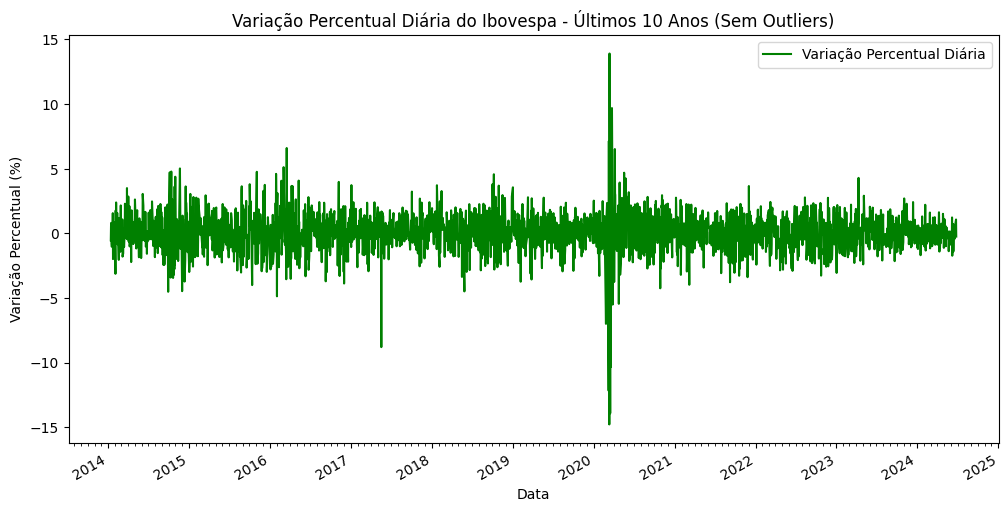

In [81]:
# Variação Percentual Diária
plt.figure(figsize=(12, 6))
plt.plot(df_no_outliers['Data'], df_no_outliers['Var%'], label='Variação Percentual Diária', color='green')

# Formatar o eixo x para melhorar a legibilidade das datas
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gcf().autofmt_xdate()

plt.xlabel('Data')
plt.ylabel('Variação Percentual (%)')
plt.title('Variação Percentual Diária do Ibovespa - Últimos 10 Anos (Sem Outliers)')
plt.legend()
plt.show()